In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [4]:
df = pd.read_csv('titanic.csv', sep=",")

# 1. Ogólny przegląd danych

In [6]:
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
764,3.0,0.0,"Dean, Mr. Bertram Frank",male,26.0,1.0,2.0,C.A. 2315,20.575,NaN,S,NaN,NaN,"Devon, England Wichita, KS"
1193,3.0,0.0,"Scanlan, Mr. James",male,NaN,0.0,0.0,36209,7.725,NaN,Q,NaN,NaN,NaN
293,1.0,1.0,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1.0,0.0,19996,52.000,C126,S,5 7,NaN,"London / East Orange, NJ"
896,3.0,0.0,"Johnson, Mr. Alfred",male,49.0,0.0,0.0,LINE,0.000,NaN,S,NaN,NaN,NaN
567,2.0,0.0,"Stokes, Mr. Philip Joseph",male,25.0,0.0,0.0,F.C.C. 13540,10.500,NaN,S,NaN,81.0,"Catford, Kent / Detroit, MI"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [8]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [9]:
df[df.isna().all(axis=1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# usunięcie wierszy, które zawierają NaN w każdej kolumnie
# utworzenie kopi df
df_copy = df.dropna(how='all')

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


In [13]:
df_copy['name'].duplicated().sum()

2

In [14]:
df_copy[df_copy['name'].duplicated(keep=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3.0,1.0,"Connolly, Miss. Kate",female,22.0,0.0,0.0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3.0,0.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


- w danych występują dwa duplikaty imion: 'Connolly, Miss. Kate' oraz 'Kelly, Mr. James'
- wiek i numer biletu są różne dla duplikatów imion
- w przypadku 'Kelly, Mr. James' port, w którym mężczyźni weszli na pokdład jest różny: Q = Queenstown, S = Southampton
- w przypadku 'Connolly, Miss. Kate' port jest ten sam: Q = Queenstown
- wnioskuję, że są to rózne osoby ze względu na wiek

In [15]:
df_copy['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [16]:
df_copy[df_copy['embarked'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


Nie wiadomo w jakim porcie na pokład statku weszły dwie osoby: 'Icard, Miss. Amelie' i 'Stone, Mrs. George Nelson (Martha Evelyn)'

In [17]:
# zamiana skrótu portu na pełną nazwę
port = {
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton'
}

df_copy['embarked'] = df_copy['embarked'].replace(port)
df_copy.sample(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17576\2970011635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['embarked'] = df_copy['embarked'].replace(port)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
616,3.0,0.0,"Ali, Mr. Ahmed",male,24.0,0.0,0.0,SOTON/O.Q. 3101311,7.0500,NaN,Southampton,NaN,NaN,NaN
581,2.0,0.0,"Watson, Mr. Ennis Hastings",male,NaN,0.0,0.0,239856,0.0000,NaN,Southampton,NaN,NaN,Belfast
936,3.0,1.0,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0,1.0,1.0,315153,22.0250,NaN,Southampton,2,NaN,NaN
1189,3.0,1.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,Southampton,13,NaN,NaN
683,3.0,0.0,"Bourke, Mr. John",male,40.0,1.0,1.0,364849,15.5000,NaN,Queenstown,NaN,NaN,"Ireland Chicago, IL"
551,2.0,1.0,"Ridsdale, Miss. Lucy",female,50.0,0.0,0.0,W./C. 14258,10.5000,NaN,Southampton,13,NaN,"London, England / Marietta, Ohio and Milwaukee..."
1120,3.0,1.0,"Persson, Mr. Ernst Ulrik",male,25.0,1.0,0.0,347083,7.7750,NaN,Southampton,15,NaN,NaN
847,3.0,0.0,"Hanna, Mr. Mansour",male,23.5,0.0,0.0,2693,7.2292,NaN,Cherbourg,NaN,188.0,NaN
18,1.0,1.0,"Bazzani, Miss. Albina",female,32.0,0.0,0.0,11813,76.2917,D15,Cherbourg,8,NaN,NaN
701,3.0,0.0,"Calic, Mr. Petar",male,17.0,0.0,0.0,315086,8.6625,NaN,Southampton,NaN,NaN,NaN


In [18]:
df_copy.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# 2. Analiza brakujących wartości

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


In [20]:
df_copy['age'].isna().sum()

263

In [21]:
df_copy.groupby('sex')['age'].apply(lambda x: x.isna().sum())

sex
female     78
male      185
Name: age, dtype: int64

In [22]:
df_copy['age'].fillna(df_copy['age'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17576\1107675004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['age'].fillna(df_copy['age'].mean(), inplace=True)


In [23]:
df_copy['age'].isna().sum()

0

# 3. Analiza pojedynczych zmiennych

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'body'}>, <Axes: >, <Axes: >]],
      dtype=object)

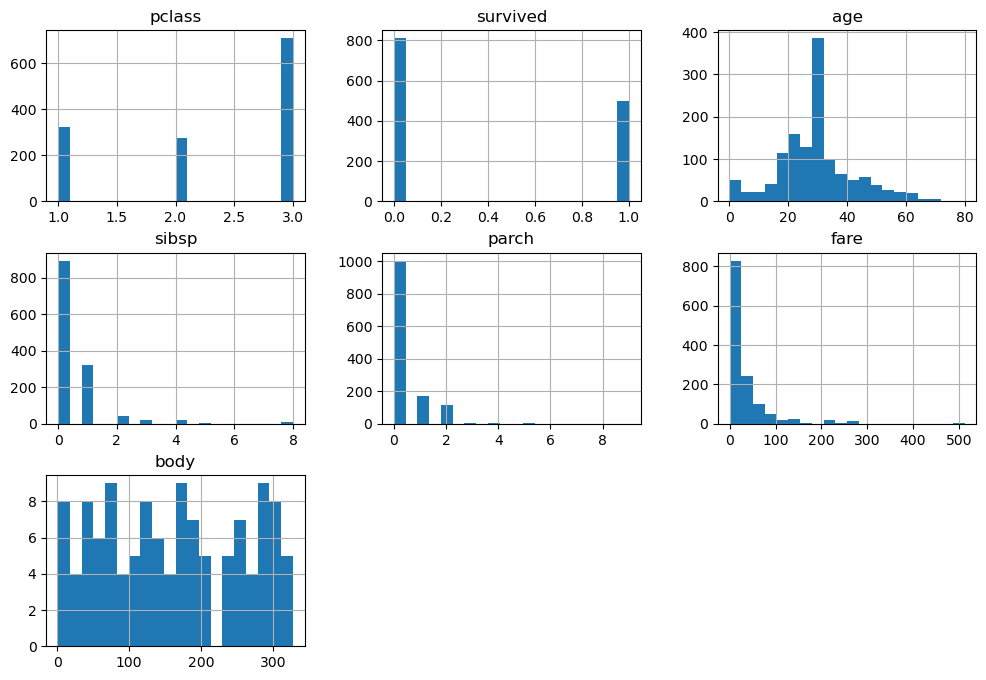

In [36]:
df_copy.hist(figsize=(12, 8), bins=20)

In [25]:
df_copy[['age']].describe().round().T

,count,mean,std,min,25%,50%,75%,max
age,1309.0,30.0,13.0,0.0,22.0,30.0,35.0,80.0


<Axes: >

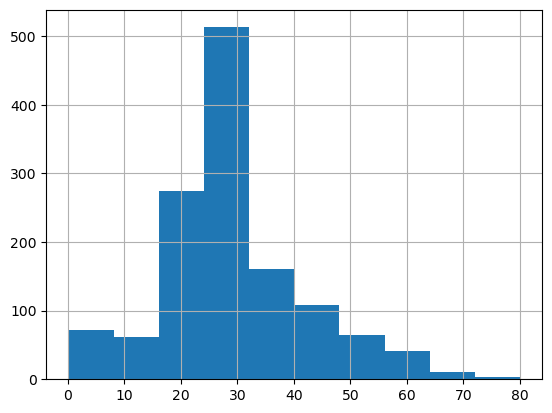

In [26]:
df_copy['age'].hist()

In [27]:
# Sprawdzam ilu mężczyzn i kobiet weszło na pokład
ilosc = df_copy['sex'].value_counts()
procent = df_copy['sex'].value_counts(normalize=True) * 100

ilosc_os = pd.DataFrame({'count': ilosc, 'percent': procent.round(2)})
ilosc_os

,count,percent
sex,,
male,843,64.4
female,466,35.6


<Axes: >

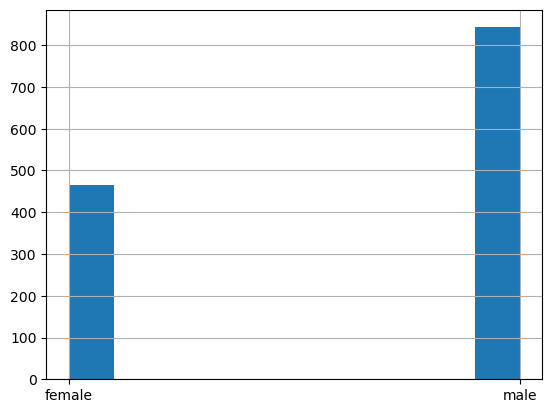

In [28]:
df_copy['sex'].hist()

In [29]:
# sprawdzam ile jest brakujących wartości NaN dla kolumny 'body'
df_copy['body'].isna().sum()

1188

In [25]:
# sprawdzam ile osób przezyło, a ile nie
df_copy['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [26]:
# ile osób weszło w poszczególnych portach
count = df_copy['embarked'].value_counts()
percent = df_copy['embarked'].value_counts(normalize=True) * 100

embarked_stats = pd.DataFrame({
    'count': count,
    'percent': percent.round(2)
})

embarked_stats

,count,percent
Southampton,914,69.93
Cherbourg,270,20.66
Queenstown,123,9.41


<Axes: >

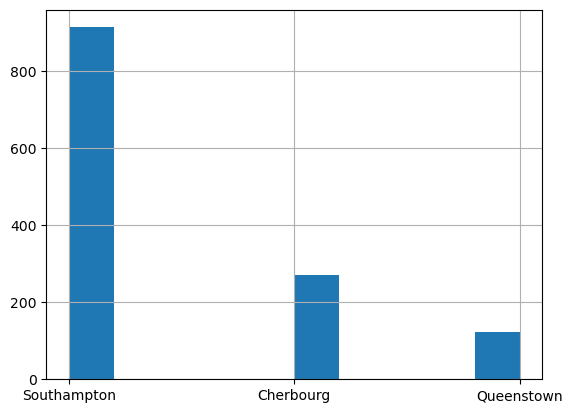

In [27]:
df_copy['embarked'].hist()

In [28]:
# ilość biletów dla danej klasy
df_copy['pclass'].value_counts().sort_index()

1.0    323
2.0    277
3.0    709
Name: pclass, dtype: int64

In [ ]:
# Liczba pasażerów w każdej klasie, posortowana rosnąco po klasie
count = df_copy['pclass'].value_counts().sort_index()

# Procentowy udział
percent = df_copy['pclass'].value_counts(normalize=True).sort_index() * 100

# Tabela
tabela_pclass = pd.DataFrame({
    'count': count,
    'percent': percent.round(2)
})

tabela_pclass

,count,percent
1.0,323,24.68
2.0,277,21.16
3.0,709,54.16


# 4. Analiza relacji między zmiennymi

In [30]:
# analizuję stosunek ilości osób, które wsiadły na pokład, do ilości osób, które nie przeżyły katastrofy z podziałem na płeć
przezyli = df_copy[df_copy['survived']==1]['sex'].value_counts()
przezyli_proc = (przezyli / ilosc) * 100
nie_przezyli = df_copy[df_copy['survived']==0]['sex'].value_counts()
nie_przezyli_proc = (nie_przezyli / ilosc) * 100

analiza_przezycia = pd.DataFrame({
    'ogolnie': ilosc, # zmienna zadeklarowana wyżej; ilość mężczyzn i kobiet, którzy weszli na pokład
    'przezyli': przezyli,
    'przezyli_%': przezyli_proc.round(2),
    'nie_przezyli_ilosc': nie_przezyli,
    'nie_przezyli_%': nie_przezyli_proc.round(2)
})

analiza_przezycia

,ogolnie,przezyli,przezyli_%,nie_przezyli_ilosc,nie_przezyli_%
female,466,339,72.75,127,27.25
male,843,161,19.10,682,80.90


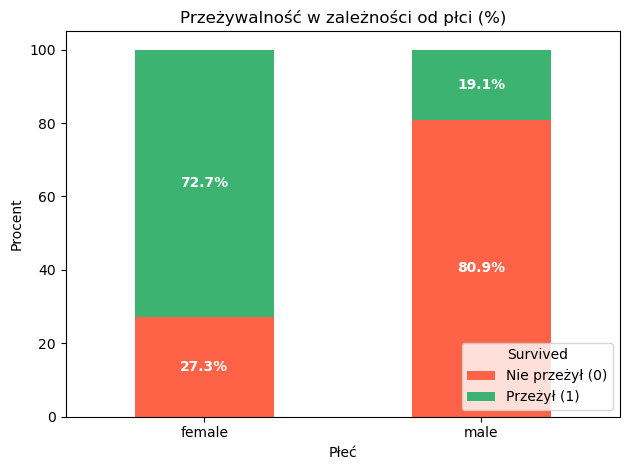

In [ ]:
survival_counts = pd.crosstab(df_copy['sex'], df_copy['survived'])
survival_percent = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100

# Wykres
ax = survival_percent.plot(kind='bar', stacked=True, color=['tomato', 'mediumseagreen'])

# Tytuły i opisy
plt.title('Przeżywalność w zależności od płci (%)')
plt.ylabel('Procent')
plt.xlabel('Płeć')
plt.xticks(rotation=0)

# Legenda w prawym dolnym rogu
plt.legend(
    title='Survived',
    labels=['Nie przeżył (0)', 'Przeżył (1)'],
    loc='lower right'
)

# Dodanie etykiet procentowych
for i, (idx, row) in enumerate(survival_percent.iterrows()):
    dead_percent = row[0]       # survived = 0
    survived_percent = row[1]   # survived = 1

    # Procent na czerwonym słupku (na dole)
    plt.text(i, dead_percent / 2, f"{dead_percent:.1f}%", 
             ha='center', va='center', color='white', fontweight='bold')

    # Procent na zielonym słupku (na górze)
    plt.text(i, dead_percent + survived_percent / 2, f"{survived_percent:.1f}%", 
             ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

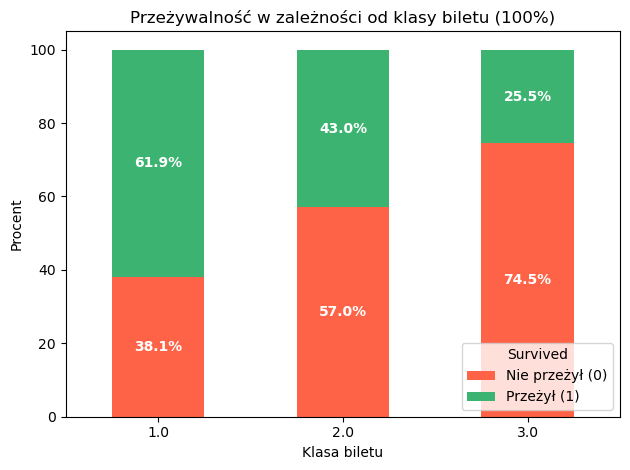

In [ ]:
survival_counts = pd.crosstab(df_copy['pclass'], df_copy['survived'])
survival_percent = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100

# Wykres
ax = survival_percent.plot(kind='bar', stacked=True, color=['tomato', 'mediumseagreen'])

# Tytuły i opisy
plt.title('Przeżywalność w zależności od klasy biletu (100%)')
plt.ylabel('Procent')
plt.xlabel('Klasa biletu')
plt.xticks(rotation=0)

# Legenda w prawym dolnym rogu
plt.legend(
    title='Survived',
    labels=['Nie przeżył (0)', 'Przeżył (1)'],
    loc='lower right'
)

# Dodanie etykiet procentowych
for i, (idx, row) in enumerate(survival_percent.iterrows()):
    dead_percent = row[0]       # survived = 0
    survived_percent = row[1]   # survived = 1

    # Procent na czerwonym słupku
    plt.text(i, dead_percent / 2, f"{dead_percent:.1f}%", 
             ha='center', va='center', color='white', fontweight='bold')

    # Procent na zielonym słupku
    plt.text(i, dead_percent + survived_percent / 2, f"{survived_percent:.1f}%", 
             ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25080\4128321334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['class_sex'] = df_copy['pclass'].astype(str) + ' - ' + df_copy['sex']


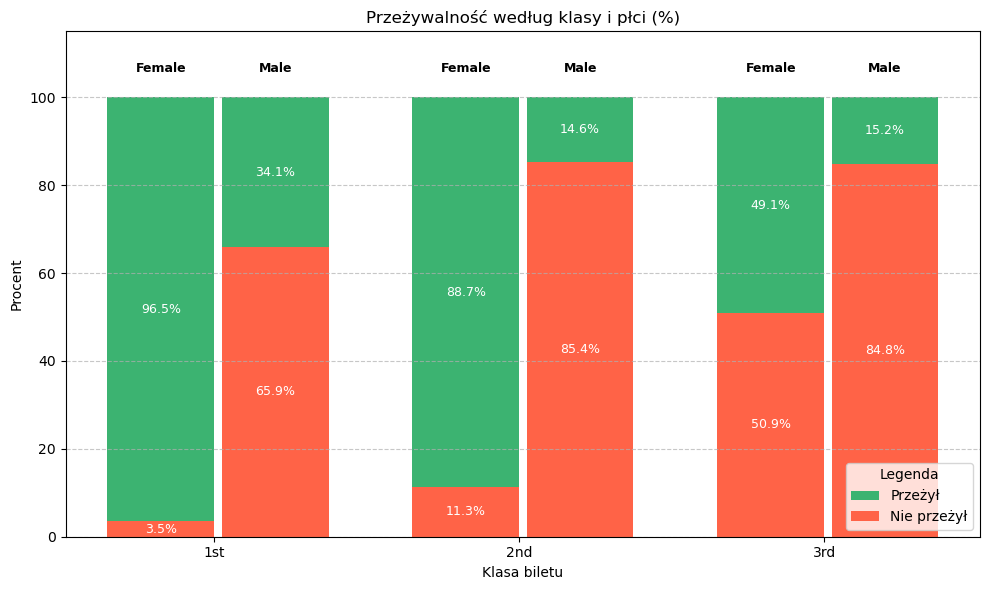

In [ ]:
# Nowa kolumna: klasa + płeć
df_copy['class_sex'] = df_copy['pclass'].astype(str) + ' - ' + df_copy['sex']

# Zliczenie przeżywalności
counts = pd.crosstab([df_copy['pclass'], df_copy['sex']], df_copy['survived'])

# Procenty w obrębie każdej grupy (kobieta/mężczyzna w klasie)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Dane do wykresu
labels = ['1st', '2nd', '3rd']
sexes = ['female', 'male']
colors = ['tomato', 'mediumseagreen']

# Pozycje słupków (dwa w każdej klasie)
x = np.arange(len(labels))  # [0, 1, 2]
width = 0.35  # szerokość słupka
gap = 0.05    # odstęp między słupkami

fig, ax = plt.subplots(figsize=(10, 6))

# Słupki dla każdej płci
for i, sex in enumerate(sexes):
    pos = x - width/2 + i*(width + gap/2)
    dead = [percentages.loc[(cls, sex)][0] if (cls, sex) in percentages.index else 0 for cls in [1, 2, 3]]
    survived = [percentages.loc[(cls, sex)][1] if (cls, sex) in percentages.index else 0 for cls in [1, 2, 3]]

    # Czerwony słupek (nie przeżył)
    ax.bar(pos, dead, width, label=f'{sex} - nie przeżył', color=colors[0])
    # Zielony słupek (przeżył)
    ax.bar(pos, survived, width, bottom=dead, label=f'{sex} - przeżył', color=colors[1])

    # Dodaj procenty na słupkach
    for j in range(len(pos)):
        total = dead[j] + survived[j]
        if total > 0:
            ax.text(pos[j], dead[j]/2, f"{dead[j]:.1f}%", ha='center', va='center', color='white', fontsize=9)
            ax.text(pos[j], dead[j] + survived[j]/2, f"{survived[j]:.1f}%", ha='center', va='center', color='white', fontsize=9)
            # Nad słupkiem etykieta płci
            ax.text(pos[j], 105, sex.capitalize(), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Opis osi
ax.set_ylabel('Procent')
ax.set_title('Przeżywalność według klasy i płci (%)')

# Oś X: jedna etykieta na środek grupy słupków
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Klasa biletu')

# Limity i siatka
ax.set_ylim(0, 115)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Legenda w rogu
#ax.legend(title='Legenda', loc='lower right')
# Własna legenda: tylko kolor + etykieta
custom_legend = [
    Patch(facecolor='mediumseagreen', label='Przeżył'),
    Patch(facecolor='tomato', label='Nie przeżył')
]

ax.legend(handles=custom_legend, title='Legenda', loc='lower right')

plt.tight_layout()
plt.show()

In [34]:
df_copy.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25080\382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000


# 6. Analiza wartości odstających

<Axes: >

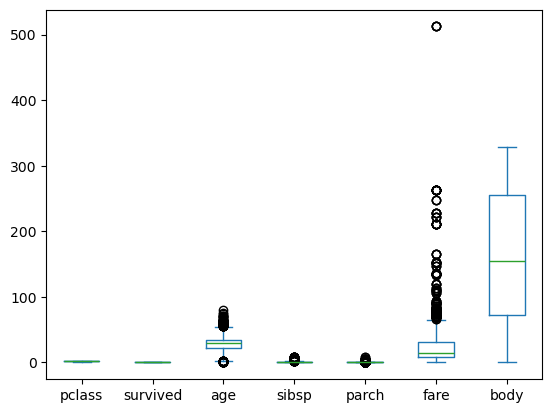

In [35]:
df_copy.plot(kind='box')

<Axes: >

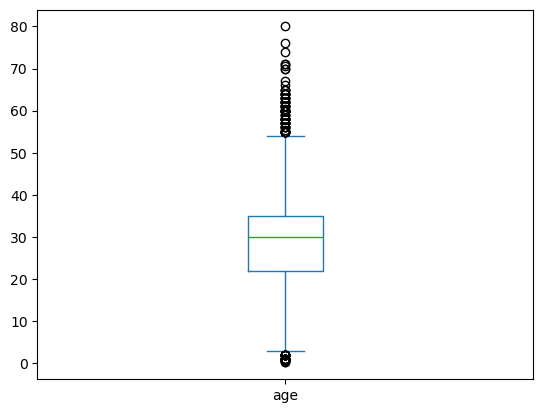

In [36]:
df_copy['age'].plot(kind='box')

<Axes: >

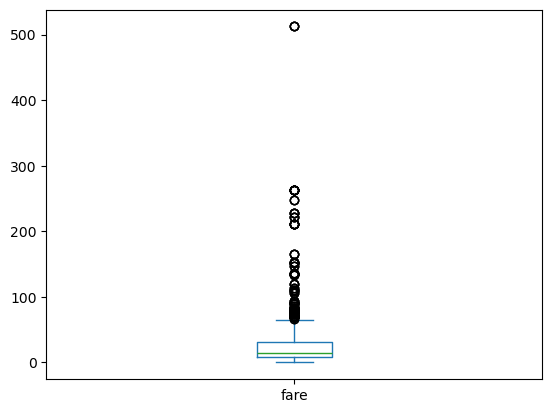

In [37]:
df_copy['fare'].plot(kind='box')

In [38]:
# dane statystyczne dla ceny biletu
df_copy['fare'].describe().astype(int)

count    1308
mean       33
std        51
min         0
25%         7
50%        14
75%        31
max       512
Name: fare, dtype: int32

<span style="color: #53a4ec">

50% biletów mieści się w przedziale 7-31, a średnia cena biletu wynosi 33.  
Trzeba przyjrzeć się cenom biletu z podziałem na klasy.
</span>

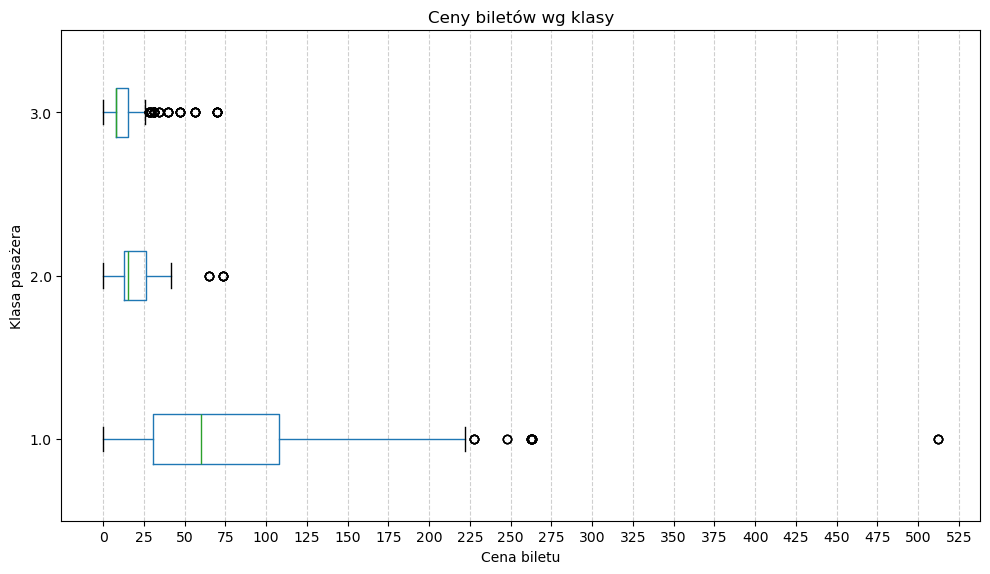

In [39]:
df_copy.boxplot(
    column='fare',
    by='pclass',
    vert=False,
    figsize=(10, 6),
    grid=False
)

# Tytuł, opisy i estetyka
plt.title('Ceny biletów wg klasy')
plt.xlabel('Cena biletu')
plt.ylabel('Klasa pasażera')
plt.suptitle('')  # Usuwa domyślny tytuł Pandas

# Podziałka osi X co 25 jednostek
plt.xticks(ticks=range(0, int(df_copy['fare'].max()) + 25, 25))

# Siatka tylko w poziomie
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [40]:
df_copy.groupby('pclass')['fare'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1.0,323.0,87.5,80.4,0.0,30.7,60.0,107.7,512.3
2.0,277.0,21.2,13.6,0.0,13.0,15.0,26.0,73.5
3.0,708.0,13.3,11.5,0.0,7.8,8.0,15.2,69.6


In [41]:
df_copy[df_copy['fare'] == df_copy['fare'].max()][['name', 'pclass', 'fare']]

,name,pclass,fare
49,"Cardeza, Mr. Thomas Drake Martinez",1.0,512.3292
50,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1.0,512.3292
183,"Lesurer, Mr. Gustave J",1.0,512.3292
302,"Ward, Miss. Anna",1.0,512.3292


# 7. Podsumowanie analizy danych

## Trasa RMS Titanic:
![Trasa RMS Titanic](https://ocdn.eu/pulscms-transforms/1/800k9kpTURBXy9mZWZkY2NiNzQ4YjI4MDFhNDhjMzEyMDgzNzk0Y2I4NS5wbmeTlQPMvR3NCRzNA_qVAs0DrADCw5UCAM0CS8LD3gADoTAFoTEBoTPD)

Całkowita ilość osób na RMS Titanic: **1309**  
Na pokładzie znajdowało się **843**	(64.4%) mężczyzn i **466**	(35.6%) kobiet.  
Ilość osób w poszczególnych klasach:  
Klasa 1: **323** ( 24.68 % )  
Klasa 2: **277** ( 21.16 % )  
Klasa 3: **709** ( 54.16 % )  

Średni wiek pasażera: **30** lat.

Średnia cena biletu dla:  
Klasy 1: **\$87.5**  
Klasy 2: **\$21.2**  
Klasy 3: **\$13.3**  

Najdroższy bilet za **$512,33** kupiły cztery osoby.

Ilość osób wchodzących na pokład w poszczególnych portach:  
Southampton	**914**, co stanowi **69.93%** wszystkich pasażerów  
Cherbourg	**270**, co stanowi	**20.66%** wszystkich pasażerów  
Queenstown	**123**, co stanowi	**9.41%** wszystkich pasażerów

Nie wiadomo w jakim porcie na pokład statku weszły dwie osoby: 'Icard, Miss. Amelie' i 'Stone, Mrs. George Nelson (Martha Evelyn)'

**500** osób przeżyło katastrofę.  
**809** nie przeżyło katastrofy, z czego odnaleziono tylko **121** ciał.  
Nie odnaleziono **688** ciał.

In [42]:
analiza_przezycia # z podziałem na płeć

,ogolnie,przezyli,przezyli_%,nie_przezyli_ilosc,nie_przezyli_%
female,466,339,72.75,127,27.25
male,843,161,19.10,682,80.90


# 8. Dodatek (ciekawostki)

Więcej informacji o RMS Titanic: https://pl.wikipedia.org/wiki/RMS_Titanic

Katastrofa RMS Titanic miała wpływ, na powstanie nadzoru gór lodowych na północnym Atlantyku:
https://www.google.com/search?q=nadzoru+g%C3%B3r+lodowych+na+p%C3%B3%C5%82nocnym+Atlantyku.&ie=UTF-8

Co wiemy na temat gór lodowych:
https://pl.wikipedia.org/wiki/G%C3%B3ra_lodowa

### W filmie Titanic pada wzmianka, o kobiecie imieniem Margaret Brown, która wsiadła Cherbourgu. Przeszła do historii jako 'Niezatapialna Molly Brown'.
https://pl.wikipedia.org/wiki/Margaret_Brown#:~:text=Z%20czasem%20jej%20historia%20by%C5%82a%20wyolbrzymiana%20i,m%C3%B3wiono%20na%20ni%C4%85%20Maggie%2C%20a%20nie%20Molly.

In [43]:
# Odnalazłem rekord; warunki: w kolumnie 'name' występuje słowo brown, kolumna 'embarked' zawiera Cherbourg
df_copy[df_copy['name'].str.contains('brown', case=False, na=False) & (df_copy['embarked'] == 'Cherbourg')]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,class_sex
41,1.0,1.0,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0.0,0.0,PC 17610,27.7208,B4,Cherbourg,6,NaN,"Denver, CO",1.0 - female
